In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils.Dataset import load_logging_data

In [2]:
train_dataset = load_logging_data(data_root_path='data/train')
val_dataset = load_logging_data(data_root_path='data/val')

Loading data...:   0%|          | 0/4 [00:00<?, ?it/s]

Loading data...:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
train_dataset['Data_Type'] = 'train'
val_dataset['Data_Type'] = 'validation'

dataset = pd.concat([train_dataset, val_dataset], axis=0)
print(dataset[dataset['Data_Type']=='train'].shape, dataset[dataset['Data_Type']=='validation'].shape)

(15995, 39) (5379, 39)


In [4]:
dataset.describe()

,Time 1 - default sample rate,BUMA 1_1 CH=4,BUMA 1_2 CH=5,BUMA 1_3 CH=6,BUMA 2_1 CH=7,BUMA 2_2 CH=8,BUMA 2_3 CH=9,BUMA 3_1 CH=10,BUMA 3_2 CH=11,BUMA 3_3 CH=12,...,angle_base_Y CH=32,na_120 CH=150,MX840B_CH 2 CH=151,MX840B_CH 3 CH=152,MX840B_CH 4 CH=153,MX840B_CH 5 CH=154,MX840B_CH 6 CH=155,MX840B_CH 7 CH=156,MX840B_CH 8 CH=157\n,Diff_Time(sec)
count,21374.000000,21374.000000,21374.000000,21374.000000,21374.000000,21374.000000,21374.000000,21374.000000,21374.000000,21374.000000,...,21374.000000,21374.000000,21374.0,21374.0,21374.0,21374.0,21374.0,21374.0,21374.0,21374.000000
mean,242.881162,3.786331,-18.945708,12.873072,5.293617,-10.764891,5.993163,-12.786187,5.980409,-10.961258,...,-140.349738,77.769754,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.099972
std,208.617985,19.975912,19.367526,31.352236,16.807898,13.166651,25.112417,18.931395,6.852307,30.196174,...,11846.700460,30.197948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001675
min,0.000000,-64.000000,-95.620000,-89.310000,-115.800000,-45.040000,-78.020000,-120.180000,-18.940000,-111.050000,...,-1000000.000000,19.350000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.000000
25%,89.000004,-12.530000,-33.257500,-4.940000,-1.710500,-21.427500,-9.497000,-19.760000,1.000250,-36.260000,...,-0.100000,63.430000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000
50%,178.100008,1.351500,-22.370000,5.972500,4.091500,-10.700000,4.105000,-11.110000,6.057500,-12.755000,...,0.100000,77.000000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000
75%,329.600016,16.400000,-8.203250,24.205000,14.490000,-1.116750,14.850000,-0.840025,9.028750,1.999750,...,0.200000,88.530000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000
max,818.600039,71.460000,67.790000,168.760000,68.110000,34.470000,144.380000,71.970000,49.990000,144.460000,...,1.400000,255.350000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000


In [5]:
angle_name_list = list(dataset.columns)[22:24] + list(dataset.columns)[26:28]
pressure_name_list = list(dataset.columns)[18:20] + list(dataset.columns)[24:26]

new_angle_name_list = ['Mast_X(deg)', 'Mast_Y(deg)', 'Base_X(deg)', 'Base_Y(deg)']
new_pressure_name_list = ['P1(bar)', 'P2(bar)', 'P3(bar)', 'P4(bar)']

dataset.rename(columns={'Time  1 - default sample rate': 'Time(sec)'}, inplace=True)
dataset.rename(columns={'caloutput_drill_depth CH=26': 'Drill_Depth(m)'}, inplace=True)
dataset.rename(columns={'caloutput_rotate_velocity CH=25': 'Drill_Rotation(RPM)'}, inplace=True)

for angle_name, new_angle_name in zip(angle_name_list, new_angle_name_list):
    dataset.rename(columns={angle_name: new_angle_name}, inplace=True)

for pressure_name, new_pressure_name in zip(pressure_name_list, new_pressure_name_list):
    dataset.rename(columns={pressure_name: new_pressure_name}, inplace=True)

dataset['Work_Load'] = (dataset[new_pressure_name_list[0]] * (dataset['Drill_Rotation(RPM)']/60))/50
dataset['Drill_Depth(m)'] = dataset['Drill_Depth(m)']/10

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21374 entries, 0 to 2762
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time(sec)                      21374 non-null  float64
 1   BUMA 1_1 CH=4                  21374 non-null  float64
 2   BUMA 1_2 CH=5                  21374 non-null  float64
 3   BUMA 1_3 CH=6                  21374 non-null  float64
 4   BUMA 2_1 CH=7                  21374 non-null  float64
 5   BUMA 2_2 CH=8                  21374 non-null  float64
 6   BUMA 2_3 CH=9                  21374 non-null  float64
 7   BUMA 3_1 CH=10                 21374 non-null  float64
 8   BUMA 3_2 CH=11                 21374 non-null  float64
 9   BUMA 3_3 CH=12                 21374 non-null  float64
 10  BUMA 4_1 CH=13                 21374 non-null  float64
 11  BUMA 4_2 CH=14                 21374 non-null  float64
 12  BUMA 4_3 CH=15                 21374 non-null  float

In [6]:
for angle_name in new_angle_name_list:
    dataset = dataset[(dataset[angle_name] > -10) & (dataset[angle_name] < 10)]

dataset.reset_index(drop=True, inplace=True)

In [7]:
dataset.describe()

,Time(sec),BUMA 1_1 CH=4,BUMA 1_2 CH=5,BUMA 1_3 CH=6,BUMA 2_1 CH=7,BUMA 2_2 CH=8,BUMA 2_3 CH=9,BUMA 3_1 CH=10,BUMA 3_2 CH=11,BUMA 3_3 CH=12,...,na_120 CH=150,MX840B_CH 2 CH=151,MX840B_CH 3 CH=152,MX840B_CH 4 CH=153,MX840B_CH 5 CH=154,MX840B_CH 6 CH=155,MX840B_CH 7 CH=156,MX840B_CH 8 CH=157\n,Diff_Time(sec),Work_Load
count,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,21366.000000,...,21366.000000,21366.0,21366.0,21366.0,21366.0,21366.0,21366.0,21366.0,21366.000000,21366.000000
mean,242.919117,3.790582,-18.941279,12.877610,5.294053,-10.764236,5.997050,-12.789272,5.981168,-10.957214,...,77.777568,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.099986,0.176994
std,208.633525,19.977570,19.364512,31.356827,16.810202,13.166671,25.115067,18.933845,6.853230,30.198933,...,30.197179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001185,0.193720
min,0.000000,-64.000000,-95.620000,-89.310000,-115.800000,-45.040000,-78.020000,-120.180000,-18.940000,-111.050000,...,19.350000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.000000,0.000000
25%,89.000004,-12.530000,-33.240000,-4.940000,-1.713250,-21.420000,-9.496250,-19.782500,1.000250,-36.257500,...,63.430000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000,0.000000
50%,178.100008,1.354500,-22.370000,5.990000,4.092500,-10.700000,4.105000,-11.110000,6.058000,-12.760000,...,77.000000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000,0.112500
75%,329.700016,16.407500,-8.203250,24.217500,14.497500,-1.119000,14.867500,-0.843050,9.029000,2.010250,...,88.530000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000,0.306613
max,818.600039,71.460000,67.790000,168.760000,68.110000,34.470000,144.380000,71.970000,49.990000,144.460000,...,255.350000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.100000,1.362437


Text(0, 0.5, 'Ratio(%)')

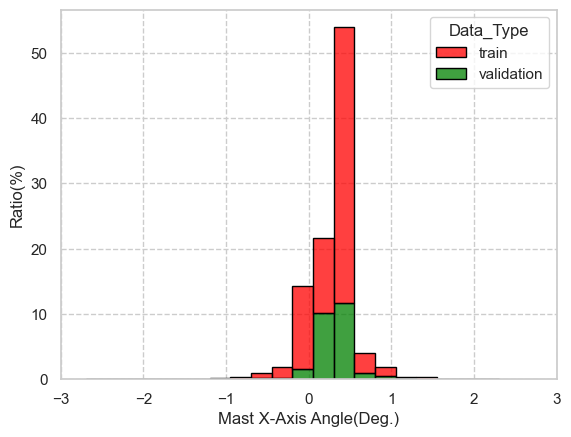

In [8]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_angle_name_list[0], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=20, multiple='stack', stat='percent')

plt.xlim(-3, 3)
plt.xlabel('Mast X-Axis Angle(Deg.)')

plt.ylabel('Ratio(%)')

In [28]:
dataset.shape

(21366, 40)

In [27]:
a = np.diff(dataset[new_angle_name_list[0]])
a.shape


(21365,)

Text(0, 0.5, 'Ratio(%)')

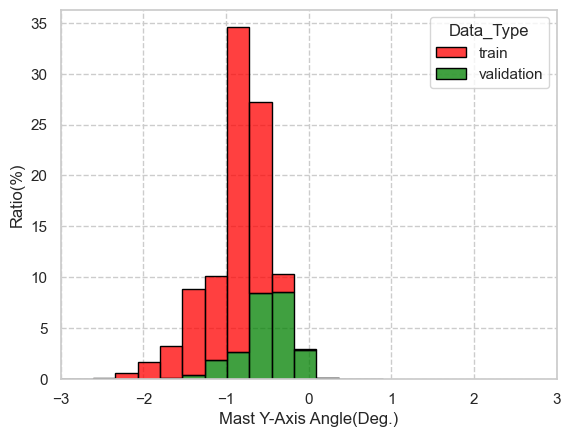

In [9]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_angle_name_list[1], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=20, multiple='stack', stat='percent')

plt.xlim(-3, 3)
plt.xlabel('Mast Y-Axis Angle(Deg.)')

plt.ylabel('Ratio(%)')

<Axes: >

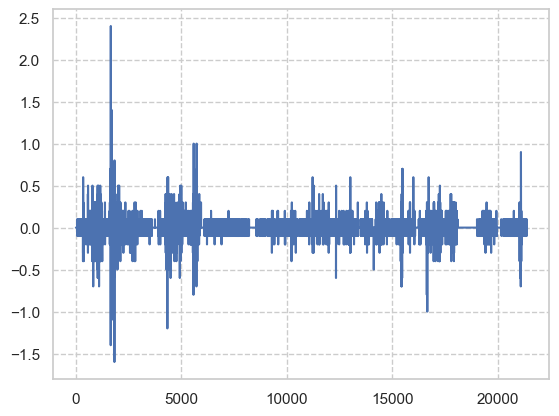

In [20]:
sns.lineplot(np.diff(dataset[new_angle_name_list[1]]))


Text(0, 0.5, 'Mast Y-Axis Angle(Deg.)')

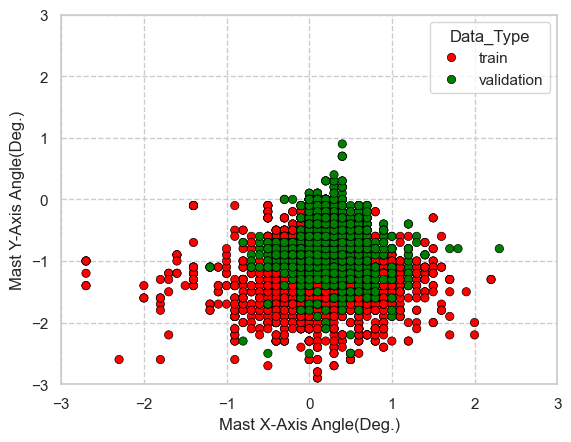

In [10]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.scatterplot(data=dataset, x=new_angle_name_list[0], y=new_angle_name_list[1], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'])

plt.xlim(-3, 3)
plt.xlabel('Mast X-Axis Angle(Deg.)')

plt.ylim(-3, 3)
plt.ylabel('Mast Y-Axis Angle(Deg.)')

Text(0, 0.5, 'Ratio(%)')

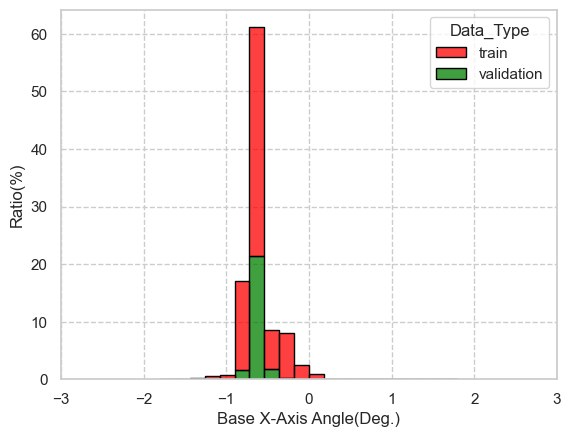

In [11]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_angle_name_list[2], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=20, multiple='stack', stat='percent')

plt.xlim(-3, 3)
plt.xlabel('Base X-Axis Angle(Deg.)')

plt.ylabel('Ratio(%)')

<Axes: >

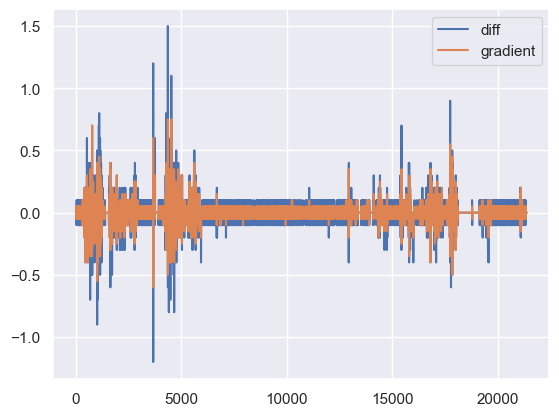

In [26]:
sns.lineplot(np.diff(dataset[new_angle_name_list[2]]), label='diff')
sns.lineplot(np.gradient(dataset[new_angle_name_list[2]]), label='gradient')


In [23]:
a = dataset[new_angle_name_list[2]]
b = np.diff(dataset[new_angle_name_list[2]])

Text(0, 0.5, 'Ratio(%)')

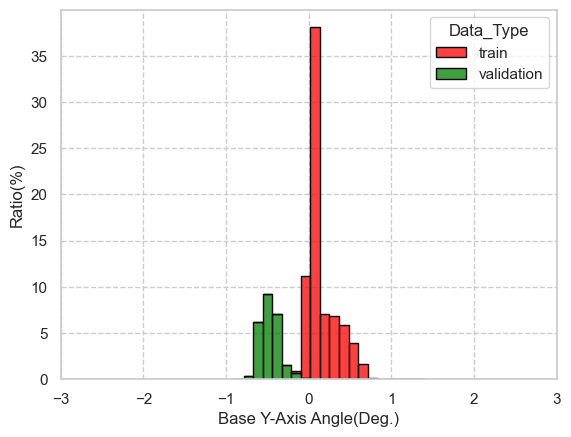

In [12]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_angle_name_list[3], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=20, multiple='stack', stat='percent')

plt.xlim(-3, 3)
plt.xlabel('Base Y-Axis Angle(Deg.)')

plt.ylabel('Ratio(%)')

<Axes: >

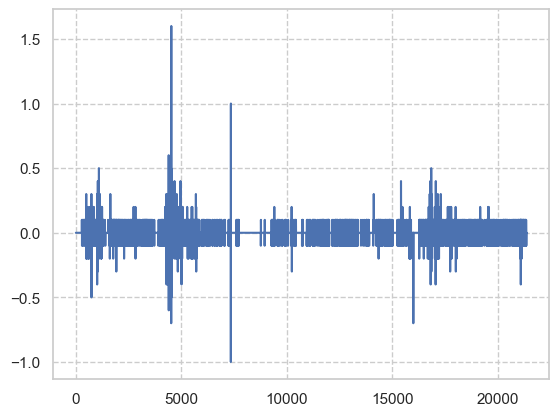

In [16]:
sns.lineplot(np.diff(dataset[new_angle_name_list[3]]))


Text(0, 0.5, 'Base Y-Axis Angle(Deg.)')

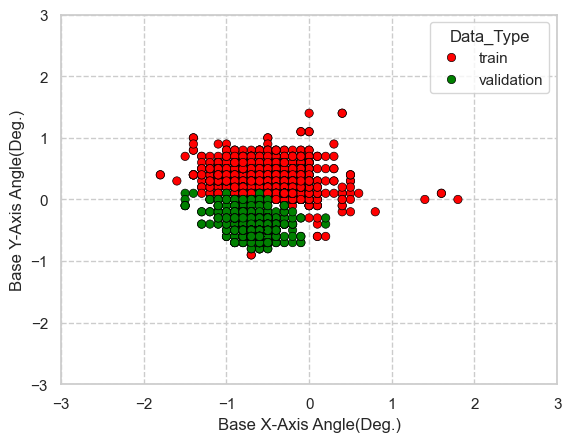

In [13]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.scatterplot(data=dataset, x=new_angle_name_list[2], y=new_angle_name_list[3], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'])

plt.xlim(-3, 3)
plt.xlabel('Base X-Axis Angle(Deg.)')

plt.ylim(-3, 3)
plt.ylabel('Base Y-Axis Angle(Deg.)')

Text(0, 0.5, 'Ratio(%)')

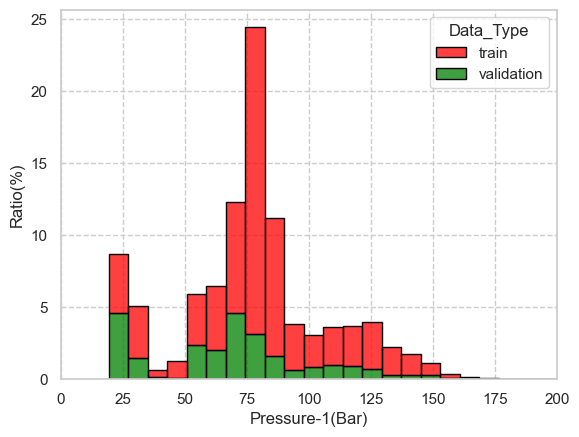

In [14]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_pressure_name_list[0], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=30, multiple='stack', stat='percent')

plt.xlim(0, 200)
plt.xlabel('Pressure-1(Bar)')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Ratio(%)')

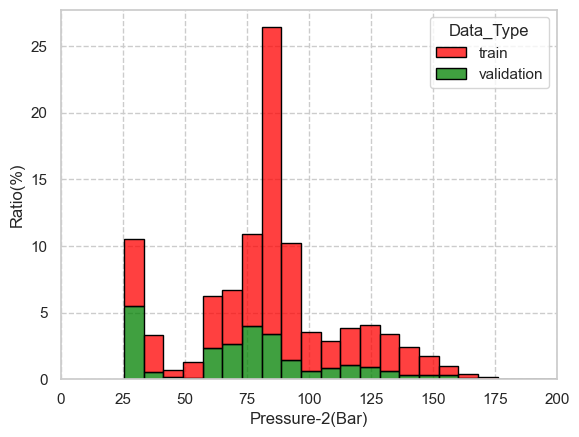

In [15]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_pressure_name_list[1], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=30, multiple='stack', stat='percent')

plt.xlim(0, 200)
plt.xlabel('Pressure-2(Bar)')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Ratio(%)')

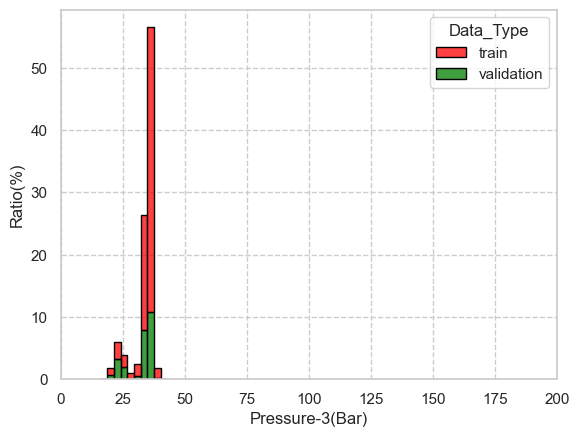

In [16]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_pressure_name_list[2], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=10, multiple='stack', stat='percent')

plt.xlim(0, 200)
plt.xlabel('Pressure-3(Bar)')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Ratio(%)')

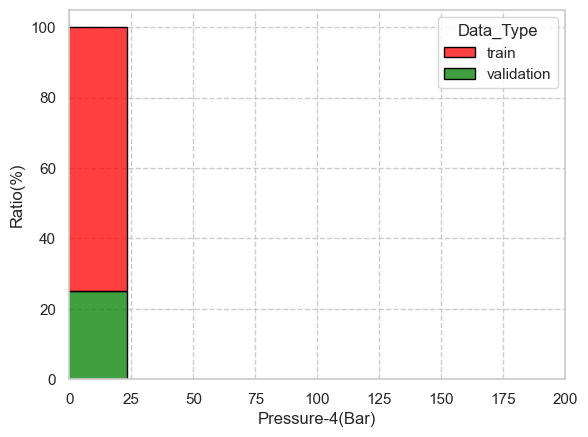

In [17]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_pressure_name_list[3], color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=10, multiple='stack', stat='percent')

plt.xlim(0, 200)
plt.xlabel('Pressure-4(Bar)')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Ratio(%)')

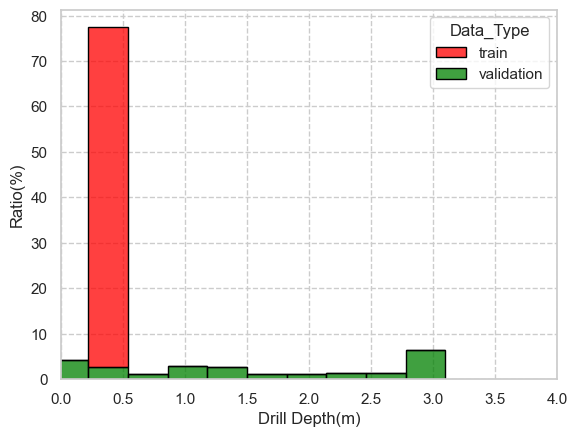

In [18]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x='Drill_Depth(m)', color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=10, multiple='stack', stat='percent')

plt.xlim(0, 4)
plt.xlabel('Drill Depth(m)')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Ratio(%)')

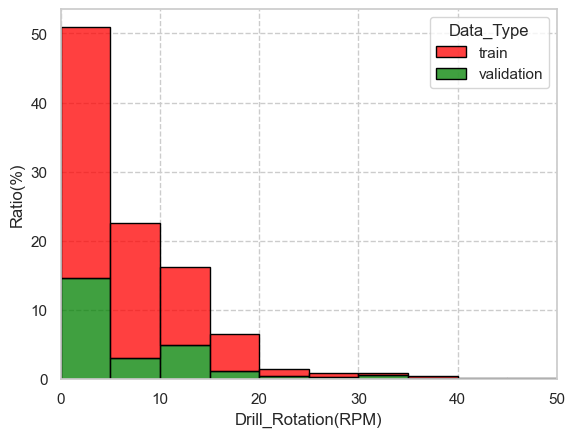

In [19]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x='Drill_Rotation(RPM)', color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=10, multiple='stack', stat='percent')

plt.xlim(0, 50)
plt.xlabel('Drill_Rotation(RPM)')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Ratio(%)')

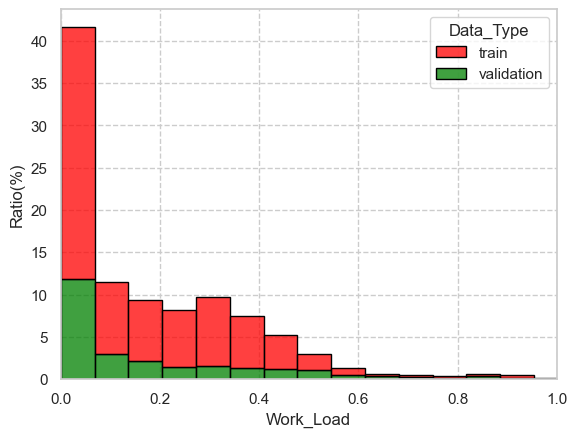

In [20]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x='Work_Load', color='red', edgecolor='black', hue='Data_Type',
                palette=['red', 'green'], bins=20, multiple='stack', stat='percent')

plt.xlim(0, 1)
plt.xlabel('Work_Load')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Ratio(%)')

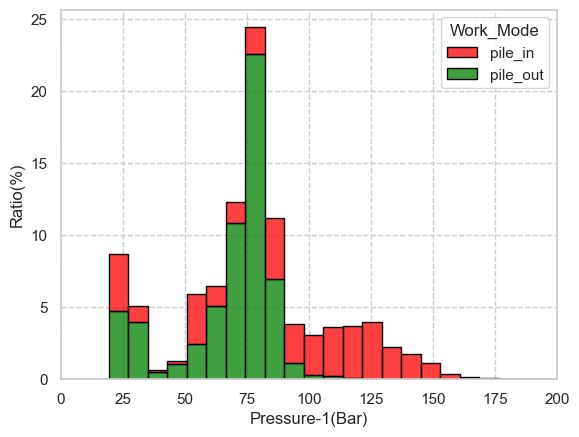

In [21]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x=new_pressure_name_list[0], color='red', edgecolor='black', hue='Work_Mode',
                palette=['red', 'green'], bins=30, multiple='stack', stat='percent')

plt.xlim(0, 200)
plt.xlabel('Pressure-1(Bar)')

plt.ylabel('Ratio(%)')

Text(0, 0.5, 'Pressure-3(Bar)')

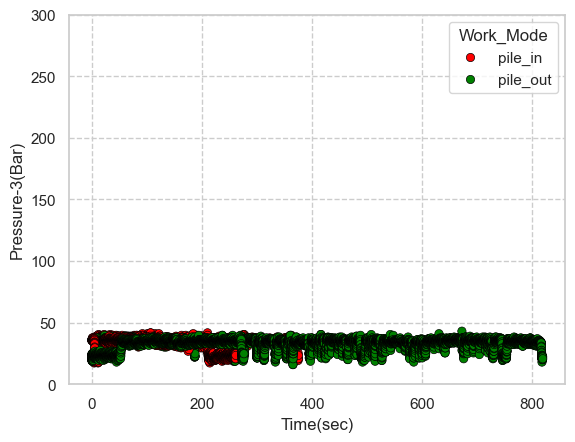

In [22]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.scatterplot(data=dataset, x='Time(sec)', y=new_pressure_name_list[2], color='red', edgecolor='black', hue='Work_Mode',
                palette=['red', 'green'])

plt.xlabel('Time(sec)')

plt.ylim(0, 300)
plt.ylabel('Pressure-3(Bar)')

Text(0, 0.5, 'Ratio(%)')

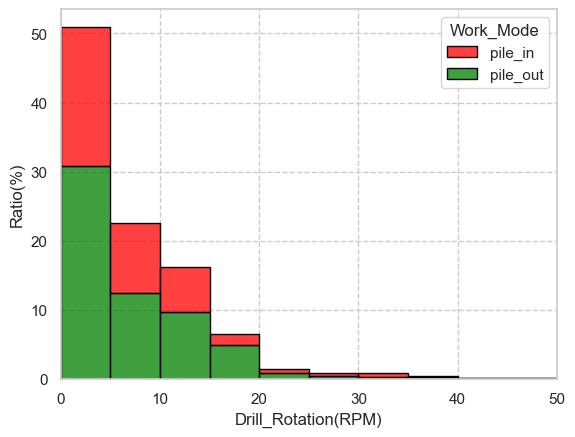

In [23]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset, x='Drill_Rotation(RPM)', edgecolor='black', hue='Work_Mode',
                palette=['red', 'green'], bins=10, multiple='stack', stat='percent')

plt.xlim(0, 50)
plt.xlabel('Drill_Rotation(RPM)')

plt.ylabel('Ratio(%)')

(0.0, 200.0)

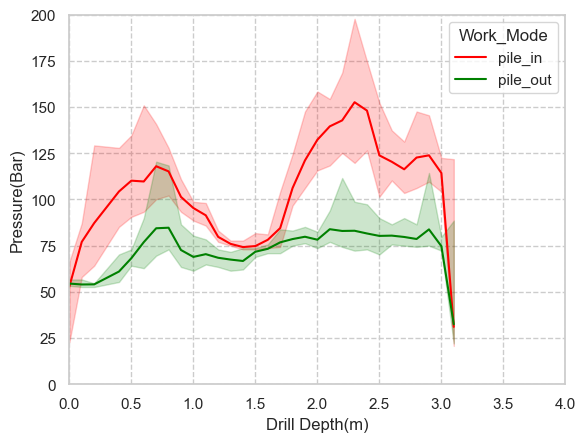

In [24]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

new_dataset = dataset[dataset['Drill_Depth(m)']!=0.3]

sns.lineplot(data=new_dataset, x='Drill_Depth(m)', y=new_pressure_name_list[0], hue='Work_Mode',
                palette=['red', 'green'], errorbar=('pi', 100))

plt.xlabel('Drill Depth(m)')
plt.xlim(0, 4)

plt.ylabel('Pressure(Bar)')
plt.ylim(0, 200)

<Axes: xlabel='Time(sec)', ylabel='Work_Load'>

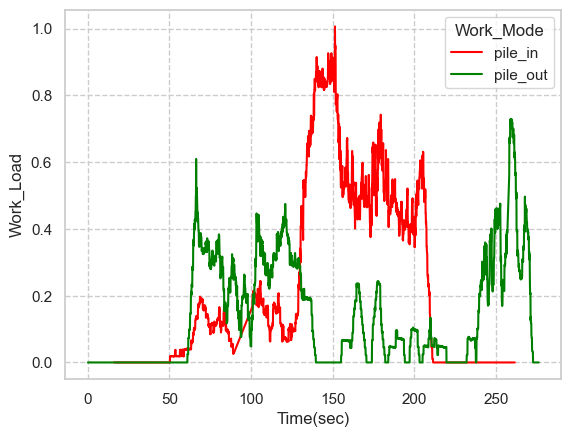

In [25]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

new_dataset = dataset[dataset['Drill_Depth(m)']!=0.3]

sns.lineplot(data=new_dataset, x='Time(sec)', y='Work_Load', hue='Work_Mode',
                palette=['red', 'green'], errorbar=('pi', 100))

Text(0, 0.5, 'Ratio(%)')

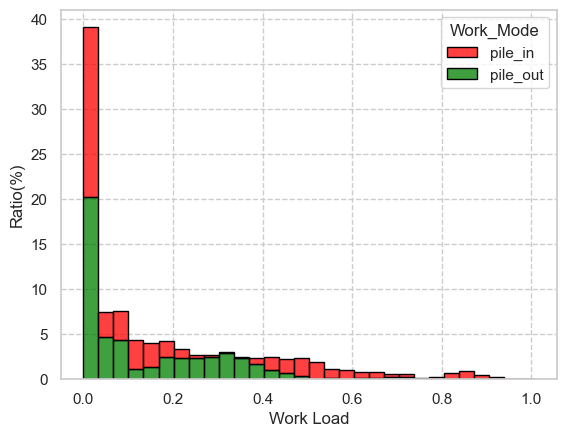

In [26]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.histplot(data=dataset[dataset['Data_Type']=='validation'], x='Work_Load', hue='Work_Mode',
                palette=['red', 'green'], edgecolor='black', multiple='stack', stat='percent')

plt.xlabel('Work Load')

plt.ylabel('Ratio(%)')

(0.0, 1.0)

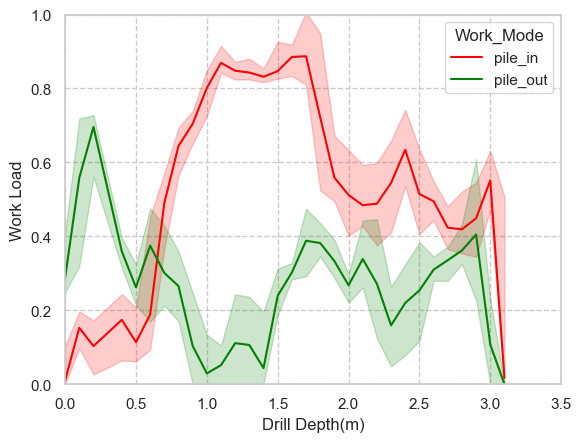

In [27]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

new_dataset = dataset[dataset['Drill_Depth(m)']!=0.3]

sns.lineplot(data=new_dataset[new_dataset['Data_Type']=='validation'], x='Drill_Depth(m)', y='Work_Load', hue='Work_Mode',
                palette=['red', 'green'], errorbar=('pi', 100))

plt.xlabel('Drill Depth(m)')
plt.xlim(0, 3.5)

plt.ylabel('Work Load')
plt.ylim(0, 1)

(0.0, 4.0)

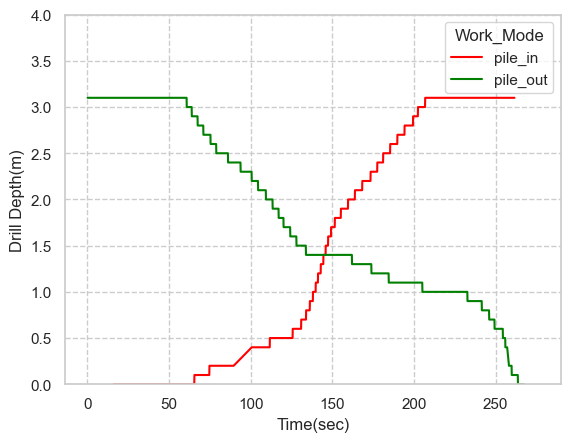

In [28]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

new_dataset = dataset[dataset['Drill_Depth(m)']!=0.3]

sns.lineplot(data=new_dataset, x='Time(sec)', y='Drill_Depth(m)', hue='Work_Mode',
                palette=['red', 'green'])

plt.xlabel('Time(sec)')

plt.ylabel('Drill Depth(m)')
plt.ylim(0, 4)

Text(0, 0.5, 'Cumulative Work Load')

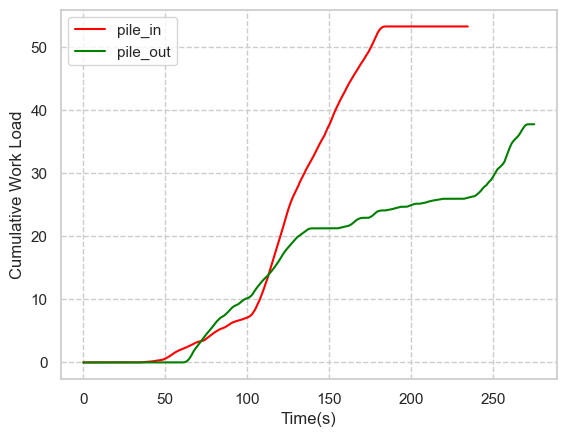

In [29]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

new_dataset = dataset[dataset['Drill_Depth(m)']!=0.3]

pile_in_cum_power = np.cumsum(new_dataset[new_dataset['Work_Mode']=='pile_in']['Work_Load'])/10
pile_out_cum_power = np.cumsum(new_dataset[new_dataset['Work_Mode']=='pile_out']['Work_Load'])/10

sns.lineplot(x=np.arange(len(pile_in_cum_power))/10, y=pile_in_cum_power, label='pile_in', color='red')
sns.lineplot(x=np.arange(len(pile_out_cum_power))/10, y=pile_out_cum_power, label='pile_out', color='green')

plt.xlabel('Time(s)')

plt.ylabel('Cumulative Work Load')

Text(0, 0.5, 'Cumulative Work Load')

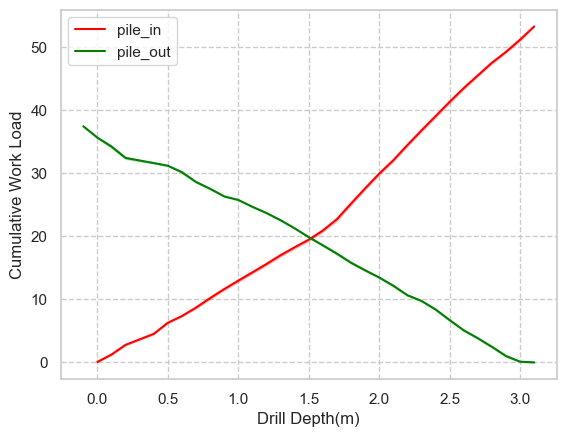

In [30]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

pile_in_power = new_dataset[new_dataset['Work_Mode']=='pile_in']['Work_Load']
pile_out_power = new_dataset[new_dataset['Work_Mode']=='pile_out']['Work_Load']

sns.lineplot(x=new_dataset[new_dataset['Work_Mode']=='pile_in']['Drill_Depth(m)'], y=pile_in_cum_power, label='pile_in', color='red')
sns.lineplot(x=new_dataset[new_dataset['Work_Mode']=='pile_out']['Drill_Depth(m)'], y=pile_out_cum_power, label='pile_out', color='green')

plt.xlabel('Drill Depth(m)')

plt.ylabel('Cumulative Work Load')

<Axes: >

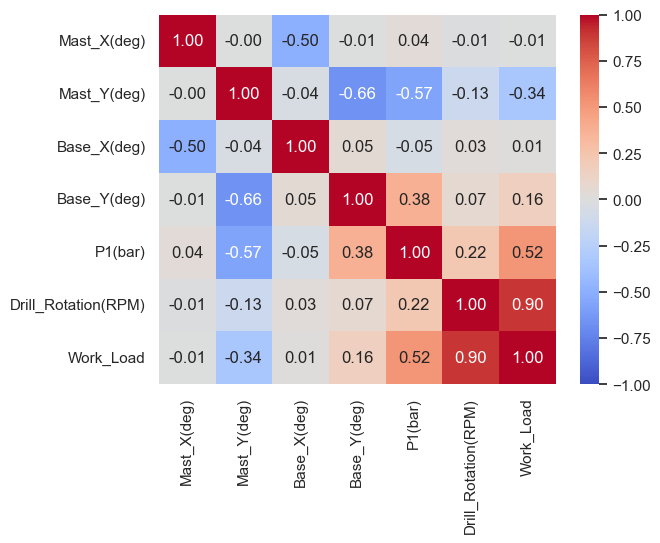

In [31]:
confusion_mat = dataset[new_angle_name_list + [new_pressure_name_list[0]] + ['Drill_Rotation(RPM)', 'Work_Load']].corr()
sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

<Axes: xlabel='Work_Load', ylabel='Mast_X(deg)'>

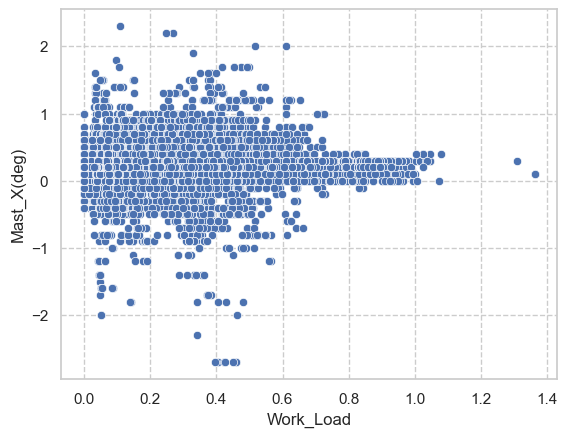

In [41]:
sns.scatterplot(data=dataset, x='Work_Load', y='Mast_X(deg)')

<Axes: xlabel='Work_Load', ylabel='Base_Y(deg)'>

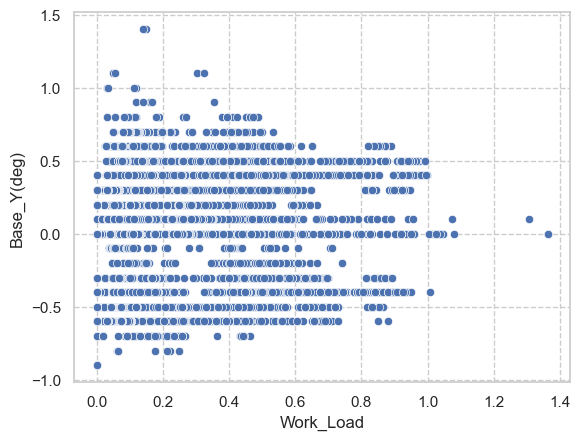

In [43]:
sns.scatterplot(data=dataset, x='Work_Load', y='Base_Y(deg)')
